In [2]:

%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pymudokon as pm

jax.config.update('jax_platform_name', 'cpu')



In [1]:

carry, accumulate = pm.simple_shear_wrapper(
    pm.MuI,
    [
        jnp.tan(jnp.deg2rad(20.9)),  # mu_s 0.381..
        jnp.tan(jnp.deg2rad(32.76)), # mu_d 0.643..
        0.279, # I0
        0.648, # phi_c
        0.5, # I_phi
        2000, # rho p (kg/m^3)
        0.0053, # d (m)
    ],
    target=10.0,
    target_start=0.01,
    dt=1e-3,
    stress_ref= -1000.0 * jnp.eye(3).reshape(3, 3),
    volume_fraction=0.7,
    keys=("stress", "strain_rate","volume_fraction"),
    store_every = 1,
    is_target_strain_rate= False,
    total_time=1.0,
)

stress_stack, strain_rate_stack,  volume_fraction_stack = accumulate

fig_ax_stack = pm.plot_suite(
    "./output/mu_I_ss_",
    strain_rate_stack,
    stress_stack,
    volume_fraction_stack,
    dt = 1e-3
    )


NameError: name 'pm' is not defined

In [41]:
# import partial
# import vmap

# @partial(jax.vmap, in_axes=(0, 0, None, None), out_axes=(0))
# def get_I(shear_strain_rate, p, d0,rho_p):
    
    
#     volumetric_strain_rate = -jnp.trace(shear_strain_rate)  # compressive strain rate is positive

#     deviatoric_strain_rate = shear_strain_rate + (1 / 3.0) * volumetric_strain_rate * jnp.eye(3)

#     dgamma_dt = jnp.sqrt(0.5 * (deviatoric_strain_rate @ deviatoric_strain_rate.T).trace())
    


def get_I(stress_stack, strain_rate_stack,d,rho_p):
    
    p_stack = pm.get_pressure(stress_stack)
    dgamma_dt = pm.get_gamma(strain_rate_stack)
    print(p_stack.shape)
    vmap_get_I = jax.vmap(lambda dgamma_dt,p: (dgamma_dt*d)/jnp.sqrt(p/rho_p), in_axes=(0,0))
    return vmap_get_I(dgamma_dt,p_stack)

I_stack = get_I(stress_stack, strain_rate_stack, 0.0053, 2000)

q_stack = pm.get_q_vm(stress_stack)

p_stack = pm.get_pressure(stress_stack)


mu_stack = (q_stack/p_stack)/jnp.sqrt(3)

(25000,)


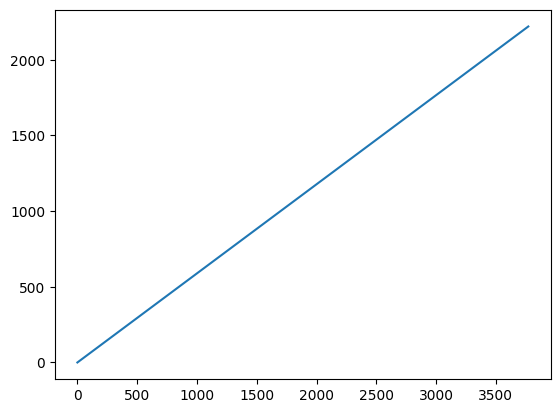

In [47]:
import matplotlib.pyplot as plt

plt.plot(p_stack,q_stack)


In [43]:
mu_stack.min(),mu_stack.max()

(Array(0.33986446, dtype=float32), Array(0.33986464, dtype=float32))

In [45]:
I_stack.min(),I_stack.max()

(Array(0.05458128, dtype=float32), Array(0.05458131, dtype=float32))